# 6.3.1절의 전처리 과정 (이하 모두 추가 코딩)
[플로우가 보이는 머신러닝 프로젝트] 4장 참조

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/2017DC1-all.csv')
df.shape

(8751, 12)

In [3]:
# 참조 코딩
df.head(3)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Date,Hour,Seasons,Functioning Day,Holiday
0,254,-5.2,37.0,2.2,2000,0.0,0.0,0.0,0.0,3.0,1.0,1.0
1,204,-5.5,38.0,0.8,2000,0.0,0.0,0.0,1.0,3.0,1.0,1.0
2,173,-6.0,39.0,1.0,2000,0.0,0.0,0.0,2.0,3.0,1.0,1.0


In [4]:
# 참조 코딩
# 결측값이 있는 컬럼명(변수명) 찾기
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [5]:
# 참조 코딩
df.dtypes

Rented Bike Count      int64
Temperature          float64
Humidity             float64
Wind speed           float64
Visibility             int64
Solar Radiation      float64
Rented Bike B        float64
Date                 float64
Hour                 float64
Seasons              float64
Functioning Day      float64
Holiday              float64
dtype: object

In [6]:
### *** Regression 기반의 모형 (Logistic Regresssion, LAR, LASSO 등 포함)은
### *** 카테고리 변수를 모두 dummy 변수로 바꾸어야 하며 그래야 Odds ratio가 제대로 구해짐에 유의

In [7]:
cols=['Rented Bike Count','Temperature', 'Humidity','Wind speed','Visibility','Solar Radiation','Rented Bike B' ]
df_cat = df.drop(cols, axis=1)  # 데이터프레임에서 7개 구간 변수 및 2개의 타겟변수 제외
df_cat.shape

(8751, 5)

In [8]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치(필요시)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df_cat.describe()

,Date,Hour,Seasons,Functioning Day,Holiday
count,8751.00,8751.00,8751.00,8751.00,8751.00
mean,9.99,11.50,1.50,0.97,0.95
std,4.23,6.92,1.11,0.18,0.22
min,0.00,0.00,0.00,0.00,0.00
25%,7.00,5.00,1.00,1.00,1.00
50%,13.00,11.00,1.00,1.00,1.00
75%,13.00,17.00,2.00,1.00,1.00
max,13.00,23.00,3.00,1.00,1.00


In [10]:
df_cat.max() - df_cat.min()

Date              13.00
Hour              23.00
Seasons            3.00
Functioning Day    1.00
Holiday            1.00
dtype: float64

In [11]:
df_cat.min()

Date              0.00
Hour              0.00
Seasons           0.00
Functioning Day   0.00
Holiday           0.00
dtype: float64

In [12]:

cols1 = ['Date','Hour','Seasons']

In [13]:
df1 = pd.get_dummies(df, columns=cols1)   # cols1에 담긴 변수들의 더미변수를 생성
                                          # 이 명령은 더미변수를 생성한 원본변수는 제거함에 유의

In [14]:
df1.head(3)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Functioning Day,Holiday,Date_0.0,Date_1.0,Date_2.0,Date_3.0,Date_4.0,Date_5.0,Date_6.0,Date_7.0,Date_8.0,Date_9.0,Date_10.0,Date_11.0,Date_12.0,Date_13.0,Hour_0.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Seasons_0.0,Seasons_1.0,Seasons_2.0,Seasons_3.0
0,254,-5.20,37.00,2.20,2000,0.00,0.00,1.00,1.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,204,-5.50,38.00,0.80,2000,0.00,0.00,1.00,1.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,173,-6.00,39.00,1.00,2000,0.00,0.00,1.00,1.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [15]:
df1.shape

(8751, 51)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Functioning Day    8751 non-null   float64
 8   Holiday            8751 non-null   float64
 9   Date_0.0           8751 non-null   bool   
 10  Date_1.0           8751 non-null   bool   
 11  Date_2.0           8751 non-null   bool   
 12  Date_3.0           8751 non-null   bool   
 13  Date_4.0           8751 non-null   bool   
 14  Date_5.0           8751 non-null   bool   
 15  Date_6.0           8751 non-null   bool   
 16  Date_7.0           8751 

In [17]:
# 참조 코딩
list(df1.columns)

['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rented Bike B',
 'Functioning Day',
 'Holiday',
 'Date_0.0',
 'Date_1.0',
 'Date_2.0',
 'Date_3.0',
 'Date_4.0',
 'Date_5.0',
 'Date_6.0',
 'Date_7.0',
 'Date_8.0',
 'Date_9.0',
 'Date_10.0',
 'Date_11.0',
 'Date_12.0',
 'Date_13.0',
 'Hour_0.0',
 'Hour_1.0',
 'Hour_2.0',
 'Hour_3.0',
 'Hour_4.0',
 'Hour_5.0',
 'Hour_6.0',
 'Hour_7.0',
 'Hour_8.0',
 'Hour_9.0',
 'Hour_10.0',
 'Hour_11.0',
 'Hour_12.0',
 'Hour_13.0',
 'Hour_14.0',
 'Hour_15.0',
 'Hour_16.0',
 'Hour_17.0',
 'Hour_18.0',
 'Hour_19.0',
 'Hour_20.0',
 'Hour_21.0',
 'Hour_22.0',
 'Hour_23.0',
 'Seasons_0.0',
 'Seasons_1.0',
 'Seasons_2.0',
 'Seasons_3.0']

In [18]:
bool_columns = df1.select_dtypes(include=['bool']).columns

# 각 bool 컬럼에 대해 True를 1로, False를 0으로 변환합니다.
df1['Functioning Day'] = df['Functioning Day'].astype(int)
df1['Holiday'] = df['Holiday'].astype(int)

for column in bool_columns:
    df1[column] = df1[column].astype(int)

In [19]:
df1.head(3)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Functioning Day,Holiday,Date_0.0,Date_1.0,Date_2.0,Date_3.0,Date_4.0,Date_5.0,Date_6.0,Date_7.0,Date_8.0,Date_9.0,Date_10.0,Date_11.0,Date_12.0,Date_13.0,Hour_0.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Seasons_0.0,Seasons_1.0,Seasons_2.0,Seasons_3.0
0,254,-5.20,37.00,2.20,2000,0.00,0.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,204,-5.50,38.00,0.80,2000,0.00,0.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,173,-6.00,39.00,1.00,2000,0.00,0.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Functioning Day    8751 non-null   int64  
 8   Holiday            8751 non-null   int64  
 9   Date_0.0           8751 non-null   int64  
 10  Date_1.0           8751 non-null   int64  
 11  Date_2.0           8751 non-null   int64  
 12  Date_3.0           8751 non-null   int64  
 13  Date_4.0           8751 non-null   int64  
 14  Date_5.0           8751 non-null   int64  
 15  Date_6.0           8751 non-null   int64  
 16  Date_7.0           8751 

In [21]:
# 기준 더미 변수(base dummy variable)로 정한 3개 더미 변수명을 cols2에 저장
cols2 = ['Date_0.0','Hour_0.0','Seasons_0.0']

df1.drop(cols2, axis=1, inplace=True)   # cols2에 저장된 3개 더미 변수명을 데이터프레임에서 제거
df1.shape

(8751, 48)

In [22]:
# 더미 변수까지만 처리하고 변수의 스케일 조정을 하지 않은 데이터프레임 df1에서
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
df1_Bike = df1.drop('Rented Bike Count', axis=1)
df1_Bike.shape

(8751, 47)

In [23]:
# 더미 변수까지만 처리하고 변수의 스케일 조정을 하지 않은 데이터프레임 df1에서
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
df1_Bike_Count = df1.drop('Rented Bike B', axis=1)
df1_Bike_Count.shape

(8751, 47)

In [24]:
df1_Bike.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-unscaled.csv', index=False)
df1_Bike_Count.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-unscaled-Count.csv', index=False)

# 스케일 표준화(StandardScaler) 파일 생성 및 저장

In [25]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만들며 연속형 타겟변수 VALP도 포함
numeric_cols = ['Rented Bike Count','Temperature', 'Humidity','Wind speed','Visibility','Solar Radiation']
df_num = df1[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임 형태로 저장
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 삭제하기 때문에, 새로 만든 데이터프레임에 다시 변수명을 입력
df_num_standard.columns = df_num.columns
df_num_standard.head()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Solar Radiation
0,-0.70,-1.51,-1.04,0.46,0.93,-0.66
1,-0.78,-1.54,-0.99,-0.90,0.93,-0.66
2,-0.82,-1.58,-0.94,-0.70,0.93,-0.66
3,-0.93,-1.60,-0.90,-0.80,0.93,-0.66
4,-0.97,-1.58,-1.09,0.56,0.93,-0.66


In [26]:
df_cat = df1.drop(numeric_cols, axis=1) # 데이터프레임 df1에서 구간변수들을 제거하여 df_num에 저장
df_cat.columns                          # df_cat의 변수명을 나열(이진값 타겟변수 VALP_B1 포함)

Index(['Rented Bike B', 'Functioning Day', 'Holiday', 'Date_1.0', 'Date_2.0',
       'Date_3.0', 'Date_4.0', 'Date_5.0', 'Date_6.0', 'Date_7.0', 'Date_8.0',
       'Date_9.0', 'Date_10.0', 'Date_11.0', 'Date_12.0', 'Date_13.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0', 'Seasons_1.0', 'Seasons_2.0', 'Seasons_3.0'],
      dtype='object')

In [27]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 모아 둔 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed',
       'Visibility', 'Solar Radiation', 'Rented Bike B', 'Functioning Day',
       'Holiday', 'Date_1.0', 'Date_2.0', 'Date_3.0', 'Date_4.0', 'Date_5.0',
       'Date_6.0', 'Date_7.0', 'Date_8.0', 'Date_9.0', 'Date_10.0',
       'Date_11.0', 'Date_12.0', 'Date_13.0', 'Hour_1.0', 'Hour_2.0',
       'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0', 'Hour_8.0',
       'Hour_9.0', 'Hour_10.0', 'Hour_11.0', 'Hour_12.0', 'Hour_13.0',
       'Hour_14.0', 'Hour_15.0', 'Hour_16.0', 'Hour_17.0', 'Hour_18.0',
       'Hour_19.0', 'Hour_20.0', 'Hour_21.0', 'Hour_22.0', 'Hour_23.0',
       'Seasons_1.0', 'Seasons_2.0', 'Seasons_3.0'],
      dtype='object')

In [28]:
dfu_standard.shape

(8751, 48)

In [29]:
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
dfu_Bike_standard = dfu_standard.drop('Rented Bike Count', axis=1)
dfu_Bike_standard.shape

(8751, 47)

In [30]:
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
dfu_standard_Count = dfu_standard.drop('Rented Bike B', axis=1)
dfu_standard_Count.shape

(8751, 47)

In [31]:
# 데이터프레임을 csv 형태로 저장
dfu_Bike_standard.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard.csv', index=False)
dfu_standard_Count.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard-Count.csv', index=False)

# 스케일 로그 변환 파일 생성 및 저장

In [32]:
# StandardScaler( )에 의한 표준화하지 않은 데이터프레임인 df1을 사용한다는데 주의!
df1.head(30)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Functioning Day    8751 non-null   int64  
 8   Holiday            8751 non-null   int64  
 9   Date_1.0           8751 non-null   int64  
 10  Date_2.0           8751 non-null   int64  
 11  Date_3.0           8751 non-null   int64  
 12  Date_4.0           8751 non-null   int64  
 13  Date_5.0           8751 non-null   int64  
 14  Date_6.0           8751 non-null   int64  
 15  Date_7.0           8751 non-null   int64  
 16  Date_8.0           8751 

In [33]:
col = ['Rented Bike Count', 'Humidity','Visibility' ]
df1[col].max()

Rented Bike Count   3556.00
Humidity              98.00
Visibility          2000.00
dtype: float64

In [34]:
df_log = df1[col].transform(lambda x: np.log(x+1))   # 데이터프레임에 로그 변환 적용
df_log.describe()

,Rented Bike Count,Humidity,Visibility
count,8751.00,8751.00,8751.00
mean,5.89,4.01,7.12
std,1.58,0.42,0.65
min,0.00,0.00,3.33
25%,5.26,3.76,6.85
50%,6.23,4.06,7.44
75%,6.97,4.32,7.60
max,8.18,4.60,7.60


In [35]:
# 주피터 노트북 사용시 seaborn 버전이 달라서 histplot이 작동 안할 때 다음과 같이 업데이팅!
!pip install -U seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


<Axes: xlabel='Visibility', ylabel='Count'>

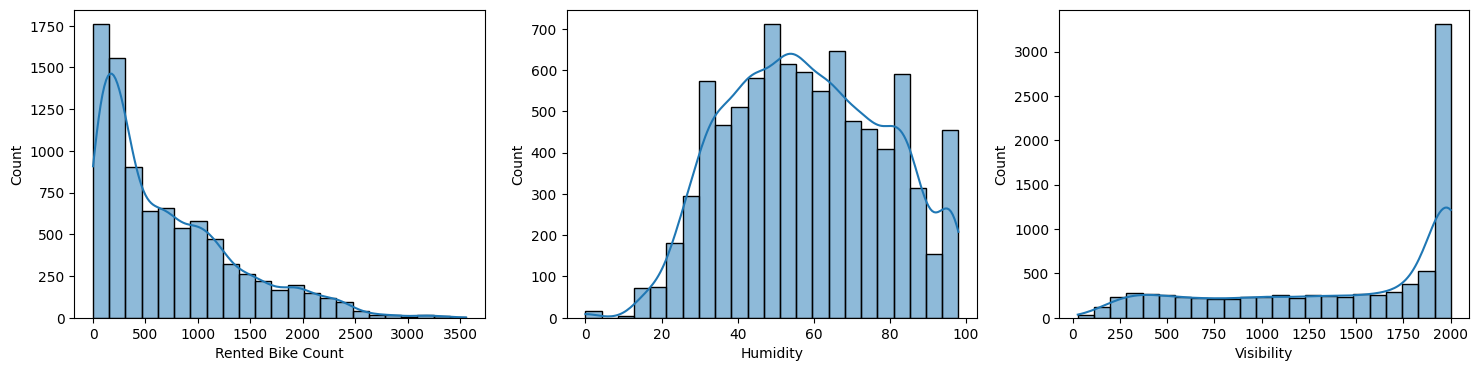

In [36]:

from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df1, x="Rented Bike Count", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df1, x="Humidity", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df1, x="Visibility", kde=True, bins=23)


<Axes: xlabel='Visibility', ylabel='Count'>

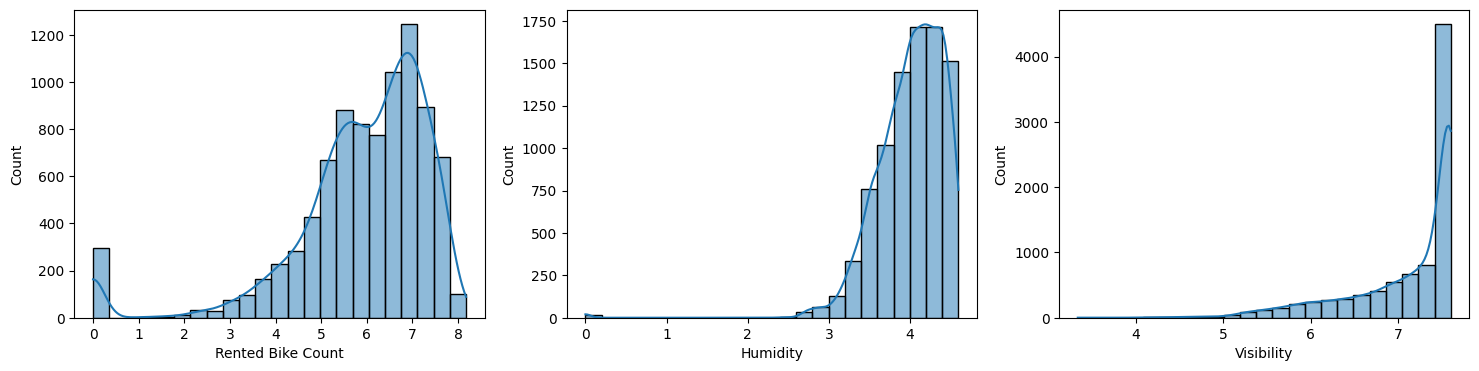

In [37]:

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df_log, x="Rented Bike Count", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df_log, x="Humidity", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df_log, x="Visibility", kde=True, bins=23)


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Functioning Day    8751 non-null   int64  
 8   Holiday            8751 non-null   int64  
 9   Date_1.0           8751 non-null   int64  
 10  Date_2.0           8751 non-null   int64  
 11  Date_3.0           8751 non-null   int64  
 12  Date_4.0           8751 non-null   int64  
 13  Date_5.0           8751 non-null   int64  
 14  Date_6.0           8751 non-null   int64  
 15  Date_7.0           8751 non-null   int64  
 16  Date_8.0           8751 

In [39]:
df1['Temperature10th'] = df1['Temperature']/10
df1[['Temperature','Temperature10th']].head(3)

,Temperature,Temperature10th
0,-5.20,-0.52
1,-5.50,-0.55
2,-6.00,-0.60


<Axes: xlabel='Solar Radiation', ylabel='Count'>

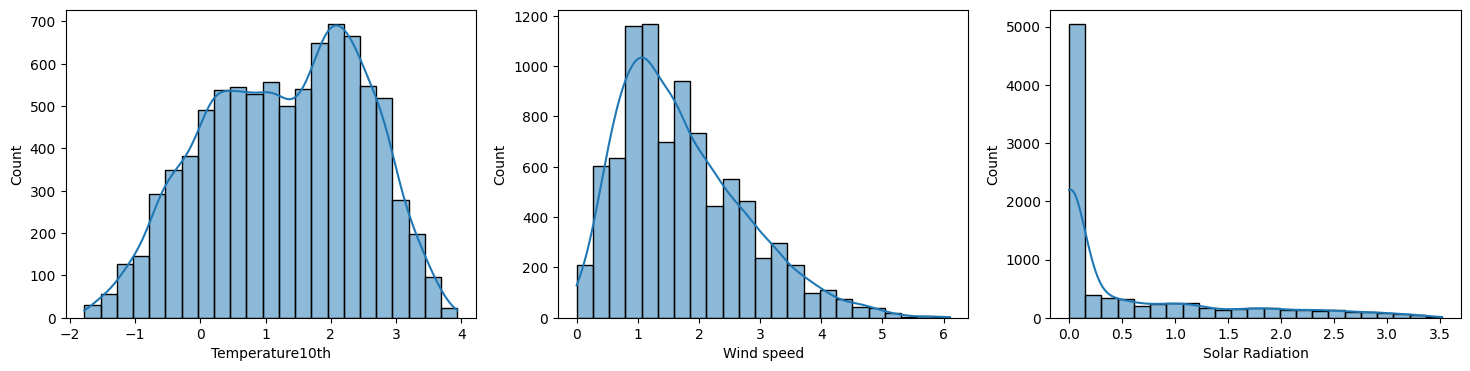

In [40]:
# 로그 변환전 나머지 4개 구간변수 히스토그램
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(ax=axes[0], data=df1, x="Temperature10th", kde=True, bins=23)
sns.histplot(ax=axes[1], data=df1, x="Wind speed", kde=True, bins=23)
sns.histplot(ax=axes[2], data=df1, x="Solar Radiation", kde=True, bins=23)


In [ ]:
# df1의 구간변수 중 달러 표기가 아닌 변수들을 df_num에 저장
# 이때 기존 구간변수 AGEP를 1/10로 스케일 조정한 AGEP10th로 대체

df_num = df1[[ 'Temperature10th','Wind speed', 'Solar Radiation']]

In [ ]:
# 달러 표기된 변수명이 df_money_log에 담겨있는지 확인
df_log.columns

Index(['Rented Bike Count', 'Humidity', 'Visibility'], dtype='object')

In [ ]:
# 스케일을 변경하지 않은 구간변수를 모든 df_num,
# 스케일을 로그변환한 구간변수를 담은 df_money_log,
# 그리고 범주형 변수를 모은 df_cat을 병합
dfu_log = pd.concat([df_num, df_log, df_cat], axis=1)
dfu_log.shape

(8751, 48)

In [ ]:
# 참조 코드
dfu_log.columns

Index(['Temperature10th', 'Wind speed', 'Solar Radiation', 'Rented Bike Count',
       'Humidity', 'Visibility', 'Rented Bike B', 'Functioning Day', 'Holiday',
       'Date_1.0', 'Date_2.0', 'Date_3.0', 'Date_4.0', 'Date_5.0', 'Date_6.0',
       'Date_7.0', 'Date_8.0', 'Date_9.0', 'Date_10.0', 'Date_11.0',
       'Date_12.0', 'Date_13.0', 'Hour_1.0', 'Hour_2.0', 'Hour_3.0',
       'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0', 'Hour_8.0', 'Hour_9.0',
       'Hour_10.0', 'Hour_11.0', 'Hour_12.0', 'Hour_13.0', 'Hour_14.0',
       'Hour_15.0', 'Hour_16.0', 'Hour_17.0', 'Hour_18.0', 'Hour_19.0',
       'Hour_20.0', 'Hour_21.0', 'Hour_22.0', 'Hour_23.0', 'Seasons_1.0',
       'Seasons_2.0', 'Seasons_3.0'],
      dtype='object')

In [ ]:
dfu_log.head(30)

,Temperature10th,Wind speed,Solar Radiation,Rented Bike Count,Humidity,Visibility,Rented Bike B,Functioning Day,Holiday,Date_1.0,Date_2.0,Date_3.0,Date_4.0,Date_5.0,Date_6.0,Date_7.0,Date_8.0,Date_9.0,Date_10.0,Date_11.0,Date_12.0,Date_13.0,Hour_1.0,Hour_2.0,Hour_3.0,Hour_4.0,Hour_5.0,Hour_6.0,Hour_7.0,Hour_8.0,Hour_9.0,Hour_10.0,Hour_11.0,Hour_12.0,Hour_13.0,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0,Seasons_1.0,Seasons_2.0,Seasons_3.0
0,-0.52,2.20,0.00,5.54,3.64,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.55,0.80,0.00,5.32,3.66,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.60,1.00,0.00,5.16,3.69,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.62,0.90,0.00,4.68,3.71,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.60,2.30,0.00,4.37,3.61,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,-0.64,1.50,0.00,4.62,4.08,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,-0.66,1.30,0.00,5.20,3.58,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,-0.76,1.10,0.01,6.84,3.64,7.60,1.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,-0.65,0.50,0.23,6.20,3.33,7.56,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,-0.35,1.20,0.65,5.83,3.22,7.60,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 연속형 타겟변수 VALP를 데이터프레임에서 제거하고 이진값 타겟변수 VALP_B1은 남김
dfu_Bike_log = dfu_log.drop('Rented Bike Count', axis=1)
dfu_Bike_log.shape

(8751, 47)

In [ ]:
# 이진값 타겟변수 VALP_B1을 데이터프레임에서 제거하고 연속형 타겟변수 VALP는 남김
dfu_log_Count = dfu_log.drop('Rented Bike B', axis=1)
dfu_log_Count.shape

(8751, 47)

In [ ]:
dfu_Bike_log.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-log.csv', index=False)
dfu_log_Count.to_csv('/content/drive/MyDrive/기말고사 과제/Bike-log-Count.csv', index=False)